# Technical Test: HELLOFRESH and FACTOR analysis

## **Overview**

### Business Problem:
Provide an understanding on the daily performance of agents from HELLOFRESH and FACTOR, which are two different lines of business, based on three given metrics: Customer Satisfaction Score (CSAT), Quality Assurance (QA), and Average Handle Time (AHT). From the given dataset, provide the data insights and in-depth data analysis with corresponding visualizations. Further deep dive analytics and additional useful insights are encouraged.

### Processing Framework:
- Data Insights Summary - The applicant is expected to clean and transform the dataset, and deliver a summary of theoverall distribution of the different metrics at the LOB level for HELLOFRESH and FACTOR.
  - Data Loading and data cleaning
  - Metrics Calculation and Data Transformation
  - The end result should be a table accompanied by visualizations that show the distribution of the metrics for each LOB, in two different time frames: week over week and the monthly performance.
  
- In-depth Data Analytics
  - Time-Series Analysis (Week over week, monthly performance)
  - Tabular representation
  - Data visualization
  - Correlation between the metrics
  - Test-Statistics between the metrics
  - Questions:
    - What relationship does the CSAT metric have with the QA metric?
    - How does the AHT metric affect the CSAT and QA metrics?
    - What are the main differences between the performance of the agents in the HELLOFRESH and FACTOR LOBs?
    - How does the performance of on-site agents compare to remote agents?

### Analytical Tools
- Python + Data Science-related Libraries
  - Numpy
  - Pandas
  - Matplotlib
  - Seaborn
- Jupyter Notebook



## Data Insight Summary

To start our data processing, I initiated the following python libraries:
- Pandas - for hgh-level data manipulation and use of DataFrames and Series
- Matplotlib - for creating data visualization
- Seaborn - for better statistical graphics
- SciPy - extending numpy by adding more algorithm for scientific and technical computing

In [1]:
####################################
# Importing Necessary Packages
####################################
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate


### Data Loading and Cleaning
- To load the test dataset, I'm using pd.read_csv, and then show the first five rows using df.head()

In [3]:
####################################
# Data Loading
####################################

dailyperf_df = pd.read_csv('/content/test_data.csv')
print(tabulate(dailyperf_df.head(), headers='keys', tablefmt='psql'))

+----+-----------+-------------+------------+---------+----------+---------+-----------+---------------+--------------------+----------------------+--------------------+------------------------+------------------+-------------------+------------------------+--------------+----------+-------------------------+------------------+
|    | AGENT     | TEAM_LEAD   | LOB        | DATE    |      EID |   TL_ID | CHANNEL   |   TOTAL_CALLS |   TOTAL_HANDLE_SEC |   TOTAL_CSAT_SURVEYS |   TOTAL_CSAT_SCORE |   TOTAL_QA_EVALUATIONS |   TOTAL_QA_SCORE |   TOTAL_CALLS_FCR |   RETURN_WITHIN_5_DAYS | WORK_SETUP   |   TENURE | NESTING_TENURE_BUCKET   | MONTHLY_TENURE   |
|----+-----------+-------------+------------+---------+----------+---------+-----------+---------------+--------------------+----------------------+--------------------+------------------------+------------------+-------------------+------------------------+--------------+----------+-------------------------+------------------|
|  0 | age

### Raw Data Examination
To examine the given raw dataset, you may set explore_dataframe to 'True'.
The following lines will show the raw data summaries that can be important for understanding the dataset.

In [6]:
####################################
# Exploring DataFrame
####################################

explore_dataframe = False
if explore_dataframe:
  print('----------------------------------')
  print(tabulate(dailyperf_df.info(), headers='keys', tablefmt='psql'))
  print('----------------------------------')
  print(tabulate(dailyperf_df.describe(), headers='keys', tablefmt='psql'))
  print('----------------------------------')
  print(f'Column labels: {dailyperf_df.columns}')
  print('----------------------------------')
  print(f'Shape of the dataframe: {dailyperf_df.shape}')
  print('----------------------------------')
  print(f'Datatypes per column: {dailyperf_df.dtypes}')

### Check Missing, Unique, and Duplicate Values

----------------------------------
Total number of null values per column: 
AGENT                        0
TEAM_LEAD                    0
LOB                          0
DATE                         0
EID                          0
TL_ID                        0
CHANNEL                   5841
TOTAL_CALLS              18329
TOTAL_HANDLE_SEC         18329
TOTAL_CSAT_SURVEYS       29312
TOTAL_CSAT_SCORE         29312
TOTAL_QA_EVALUATIONS     36831
TOTAL_QA_SCORE           36831
TOTAL_CALLS_FCR          24202
RETURN_WITHIN_5_DAYS     24202
WORK_SETUP                 466
TENURE                       0
NESTING_TENURE_BUCKET        0
MONTHLY_TENURE               0
dtype: int64
----------------------------------
Total number of duplicates: 3463
----------------------------------
Number of unique values: 
AGENT                      641
TEAM_LEAD                   60
LOB                          8
DATE                        31
EID                        640
TL_ID                       51
CHANNEL

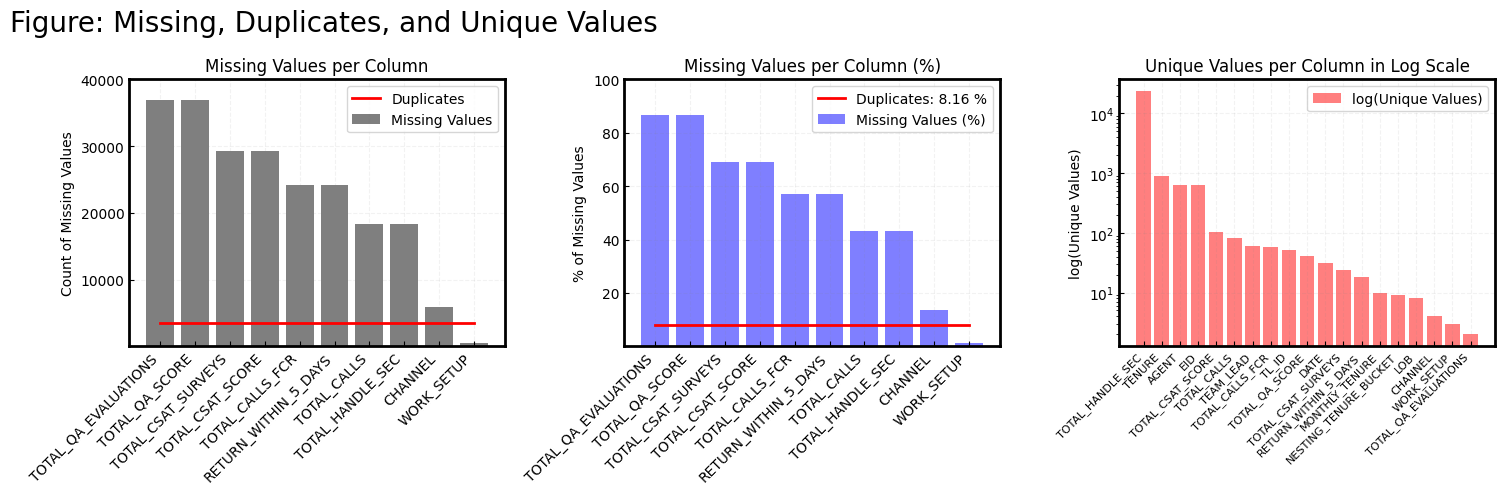

In [9]:
###############################################################
# Checking for Duplicates, Missing Values, and Unique Elements
###############################################################

checking_values = False
checking_visuals = False

# Check the Missing Values
missing_values = dailyperf_df.isnull().sum()
missing_values_sorted_nonzero = missing_values[missing_values > 0].sort_values(ascending = False)

# Count the Missing Values
duplicates_count = dailyperf_df.duplicated().sum()

# Check the Number of unique values
number_of_unique_values = dailyperf_df.nunique()
unique_values_sorted = number_of_unique_values.sort_values(ascending = False)

if checking_values:
  print('----------------------------------')
  print(f'Total number of null values per column: \n{missing_values}')
  print('----------------------------------')
  print(f'Total number of duplicates: {duplicates_count}')
  print('----------------------------------')
  print(f'Number of unique values: \n{number_of_unique_values}')

if checking_visuals:
  # Creating a plot for missing values, duplicates, and number of unique items
  # I have used matplotlib to show some control in how I create my plots, later, seaborn-based plots will be implemented

  fig, axes = plt.subplots(1, 3, figsize=(15, 5))
  fig.suptitle('Figure: Missing, Duplicates, and Unique Values', fontsize=20, ha= 'left', x=0 )

  # Plot for Missing Values
  axes[0].bar(missing_values_sorted_nonzero.index, missing_values_sorted_nonzero.values, color = 'k', alpha = 0.5)
  axes[0].plot(missing_values_sorted_nonzero.index, [duplicates_count for i in range(len(missing_values_sorted_nonzero.index))], color = 'r', linewidth = 2, linestyle = '-')
  axes[0].set_title('Missing Values per Column')
  axes[0].set_ylabel('Count of Missing Values')
  axes[0].tick_params(axis = 'x', rotation = 45)
  for label in axes[0].get_xticklabels():
    label.set_ha('right')
  axes[0].locator_params(axis = 'y', nbins = 7)
  yticks = axes[0].get_yticks()
  yticks = yticks[yticks != 0]
  axes[0].set_yticks(yticks)
  axes[0].tick_params(axis='both', direction = 'in')
  for spine in axes[0].spines.values():
    spine.set_linewidth(2)
  axes[0].grid(True, linestyle = '--', color = 'gray', alpha = 0.1)
  axes[0].legend(['Duplicates', 'Missing Values'])

  # Plot for Missing Values in Percentage
  axes[1].bar(missing_values_sorted_nonzero.index, (missing_values_sorted_nonzero.values/dailyperf_df.shape[0])*100, color = 'b', alpha = 0.5, label=f'Missing Values (%)')
  axes[1].plot(missing_values_sorted_nonzero.index, [(duplicates_count/dailyperf_df.shape[0]*100) for i in range(len(missing_values_sorted_nonzero.index))], color = 'r', linewidth = 2, linestyle = '-', label = f'Duplicates: {(duplicates_count/dailyperf_df.shape[0]*100):.2f} %')
  axes[1].set_title('Missing Values per Column (%)')
  axes[1].set_ylabel('% of Missing Values')
  axes[1].tick_params(axis = 'x', rotation = 45)
  for label in axes[1].get_xticklabels():
    label.set_ha('right')
  axes[1].locator_params(axis = 'y', nbins = 7)
  yticks = axes[1].get_yticks()
  yticks = yticks[yticks != 0]
  axes[1].set_yticks(yticks)
  axes[1].legend()
  axes[1].tick_params(axis='both', direction = 'in')
  for spine in axes[1].spines.values():
    spine.set_linewidth(2)
  axes[1].grid(True, linestyle = '--', color = 'gray', alpha= 0.1)

  # Plot for Number of Unique values
  axes[2].bar(unique_values_sorted.index, unique_values_sorted.values, color= 'r', alpha = 0.5)
  axes[2].set_title('Unique Values per Column in Log Scale')
  axes[2].set_ylabel('log(Unique Values)')
  axes[2].tick_params(axis = 'x', rotation = 45)
  for label in axes[2].get_xticklabels():
    label.set_ha('right')
  axes[2].locator_params(axis = 'y', nbins = 7)
  yticks = axes[2].get_yticks()
  yticks = yticks[yticks != 0]
  axes[2].set_yticks(yticks)
  axes[2].set_yscale('log')
  axes[2].tick_params(axis='both', direction = 'in')
  axes[2].tick_params(axis ='x', labelsize = 8)
  axes[2].grid(True, linestyle = '--', color = 'gray',alpha =0.1)
  axes[2].legend(['log(Unique Values)'])

  for spine in axes[2].spines.values():
    spine.set_linewidth(2)

  plt.tight_layout()
  plt.show()



Based on the data visuals, the dataset were filled with NaNs and duplicates. In order for the dataset to be useful for any kind of analysis, I need to clean the dataset by filling NaN values with 0, and removing duplicates in the data. Also, I have ploted the unique values using the log-scale, to rescale the extremely small values compared to the largest amount (The total_hand_sec column)

It is a bit concerning that the amount of missing values for some of the columns were reaching between 60-85% and the number of duplicates was at 8.16%. These factors could significantly affect the analysis.

In [10]:
#################################################
# Dropping Duplicates and Filling Missing Values
#################################################

dropDuplicates_dailyperf_df = dailyperf_df.drop_duplicates()
filled_dailyperf_df = dropDuplicates_dailyperf_df.fillna(0)
dailyperf_df = filled_dailyperf_df

print('----------------------------------')
if (dailyperf_df.isnull().sum() == 0).all().all():
  print(f'CHECKING - Total number of null values in all columns: 0')
else:
  print(f'CHECKING - Total number of null values: {dailyperf_df.isnull().sum()}')
print('----------------------------------')
print(f'CHECKING - Total number of duplicates in cleaned dataframe: {dailyperf_df.duplicated().sum()}')

----------------------------------
CHECKING - Total number of null values in all columns: 0
----------------------------------
CHECKING - Total number of duplicates in cleaned dataframe: 0


### In-depth Data Analysis

The technical exam provided 3 metrics:
- CSAT: Customer Satisfaction Score, calculated as the total csat score divided by the total csat surveys.
  - In this score, the closer it gets to 1.0, the better.
- QA: Quality Assurance Score, calculated as the total qa score divided by the total qa evaluations.
  - In this score, the closer it gets to 1.0, the better.
- AHT: Average Handle Time, calculated as the total handle time divided by the total calls.
  - The higher the AHT, the poorer the service.

In [11]:
##################################
# Metric Columns (CSAT, QA, AHT)
##################################

# Convert all column names to lowercase
dailyperf_df.columns = dailyperf_df.columns.str.lower()

# Run this only once (to avoid inserting the metric columns more than once)

dailyperf_df['csat'] = dailyperf_df['total_csat_score']/dailyperf_df['total_csat_surveys']
dailyperf_df['qa'] = dailyperf_df['total_qa_score']/dailyperf_df['total_qa_evaluations']
dailyperf_df['aht'] = dailyperf_df['total_handle_sec']/dailyperf_df['total_calls']

In [ ]:
# In case of duplicates, you may enable this
columns_duplicated = False
if columns_duplicated:
  dailyperf_df = dailyperf_df.loc[:,~dailyperf_df.columns.duplicated()]
  print(dailyperf_df.head())



In order to proceed in answering the provided questions in the technical exam, I need to choose the necesssary columns. These are 'date', 'lob', 'work_setup','csat', 'qa', and 'aht'. Calculating the metrics produced some NaN, so I need to replace their values with 0. I have formatted the data column using pd.to_datetime, so that I could extract the week number and month details from the date column values. After further processing, I have arranged the columns according to my preferrence.

In [12]:
###############################################
# Preparing the Cleaned Dataframe for Analysis
###############################################

# Choose the columns of interest
df_analysis = dailyperf_df[['date','lob', 'work_setup','csat', 'qa', 'aht']]

# Fill the missing values (NaN) resulting from calculating CSAT, QA, and AHT
df_analysis_filled = df_analysis.fillna(0)
df_analysis_copy = df_analysis_filled.copy()

# Convert dates using pd.to_datetime()
df_analysis_copy['date'] = pd.to_datetime(df_analysis_copy['date'], format='%m/%d/%y')
df_analysis_copy['week'] = df_analysis_copy['date'].dt.isocalendar().week
df_analysis_copy['month'] = df_analysis_copy['date'].dt.month

df_analysis = df_analysis_copy
new_order = ['date','week','month', 'lob', 'work_setup','csat', 'qa', 'aht']
df_analysis = df_analysis[new_order]

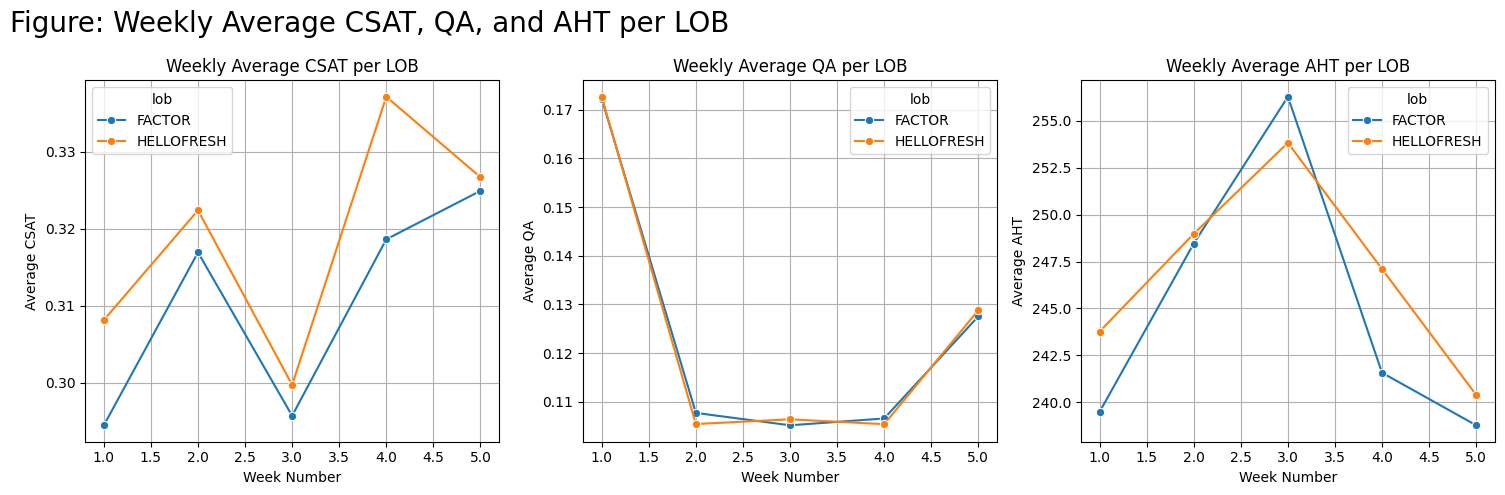

In [13]:
############################################################
# Data Visualization for the Metric per LOB (Weekly Average)
############################################################
week_csat = df_analysis.groupby(['lob', 'week'])['csat'].mean().reset_index()
week_csat = week_csat[week_csat['lob'].isin(['HELLOFRESH','FACTOR'])]
week_qa = df_analysis.groupby(['lob', 'week'])['qa'].mean().reset_index()
week_qa = week_qa[week_qa['lob'].isin(['HELLOFRESH','FACTOR'])]
week_aht = df_analysis.groupby(['lob', 'week'])['aht'].mean().reset_index()
week_aht = week_aht[week_aht['lob'].isin(['HELLOFRESH','FACTOR'])]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Figure: Weekly Average CSAT, QA, and AHT per LOB', fontsize=20, ha= 'left', x=0 )

for ax, metric, dataset in zip(axes, ['csat', 'qa', 'aht'], [week_csat, week_qa, week_aht]):
  sns.lineplot(
      data=dataset,
      x='week',
      y=metric,
      hue='lob',
      marker='o',
      ax = ax
  )
  ax.set_xlabel('Week Number')
  ax.set_ylabel(f'Average {metric.upper()}')
  ax.set_title(f'Weekly Average {metric.upper()} per LOB')
  ax.grid(True)

plt.tight_layout()
plt.show()

Based on the weekly average for both Hello Fresh and Factor, the CSAT shows a similar correspondence, where the CSAT scores were low in the 3rd week. QA scores are also low between week 2 to week 4. The AHB for both lines of business were high around week 2 and week 4, with its peak at week 3. It suggests that the CSAT and QA were both low within the timeframe when AHT was the highest.

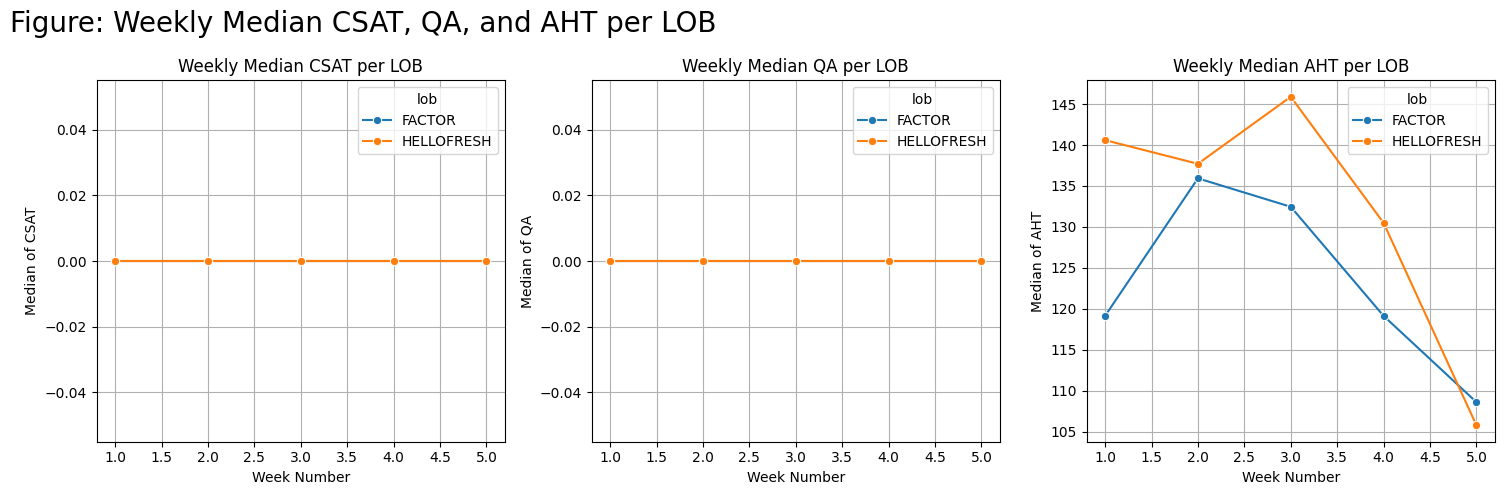

In [14]:
############################################################
# Data Visualization for the Metric per LOB (Weekly Median)
############################################################
week_csat = df_analysis.groupby(['lob', 'week'])['csat'].median().reset_index()
week_csat = week_csat[week_csat['lob'].isin(['HELLOFRESH','FACTOR'])]
week_qa = df_analysis.groupby(['lob', 'week'])['qa'].median().reset_index()
week_qa = week_qa[week_qa['lob'].isin(['HELLOFRESH','FACTOR'])]
week_aht = df_analysis.groupby(['lob', 'week'])['aht'].median().reset_index()
week_aht = week_aht[week_aht['lob'].isin(['HELLOFRESH','FACTOR'])]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Figure: Weekly Median CSAT, QA, and AHT per LOB', fontsize=20, ha= 'left', x=0 )

for ax, metric, dataset in zip(axes, ['csat', 'qa', 'aht'], [week_csat, week_qa, week_aht]):
  sns.lineplot(
      data=dataset,
      x='week',
      y=metric,
      hue='lob',
      marker='o',
      ax = ax
  )
  ax.set_xlabel('Week Number')
  ax.set_ylabel(f'Median of {metric.upper()}')
  ax.set_title(f'Weekly Median {metric.upper()} per LOB')
  ax.grid(True)

plt.tight_layout()
plt.show()

Based on the weekly median for both Hello Fresh and Factor, the CSAT and QA shows flat 0 values due to a lot of NaN values that were replaced with 0. It is interesting that the Median of AHB for both lines of business were faling from week 3 to week 5, but still peak at week 3. It suggests that AHT improves within the later part of the month.

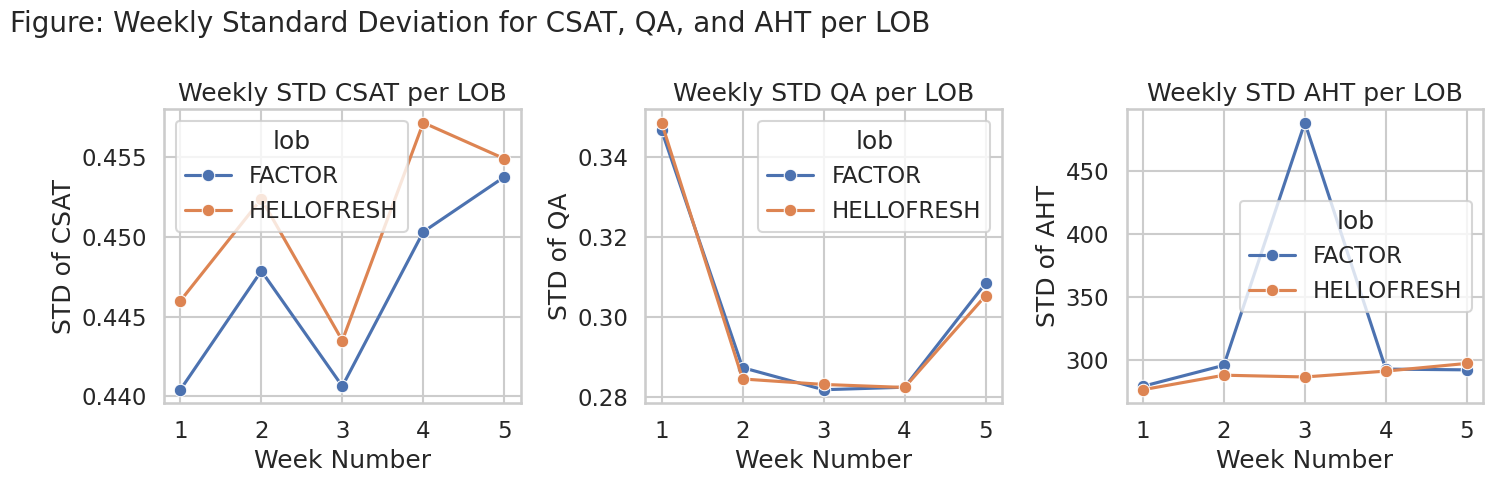

In [53]:
###########################################################################
# Data Visualization for the Metric per LOB (Weekly Standard Deviation)
###########################################################################

week_csat = df_analysis.groupby(['lob', 'week'])['csat'].std().reset_index()
week_csat = week_csat[week_csat['lob'].isin(['HELLOFRESH','FACTOR'])]
week_qa = df_analysis.groupby(['lob', 'week'])['qa'].std().reset_index()
week_qa = week_qa[week_qa['lob'].isin(['HELLOFRESH','FACTOR'])]
week_aht = df_analysis.groupby(['lob', 'week'])['aht'].std().reset_index()
week_aht = week_aht[week_aht['lob'].isin(['HELLOFRESH','FACTOR'])]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Figure: Weekly Standard Deviation for CSAT, QA, and AHT per LOB', fontsize=20, ha= 'left', x=0 )

for ax, metric, dataset in zip(axes, ['csat', 'qa', 'aht'], [week_csat, week_qa, week_aht]):
  sns.lineplot(
      data=dataset,
      x='week',
      y=metric,
      hue='lob',
      marker='o',
      ax = ax
  )
  ax.set_xlabel('Week Number')
  ax.set_ylabel(f'STD of {metric.upper()}')
  ax.set_title(f'Weekly STD {metric.upper()} per LOB')
  ax.grid(True)

plt.tight_layout()
plt.show()

The standard deviation, or the spread of data from the mean, is similar for both lines of business when we looked at CSAT and QA. For AHT, there's a difference between hello fresh and factors STD in week 3. This suggest that the average handled time in week 3 were bit apart from each other for Factor than Hello Fresh

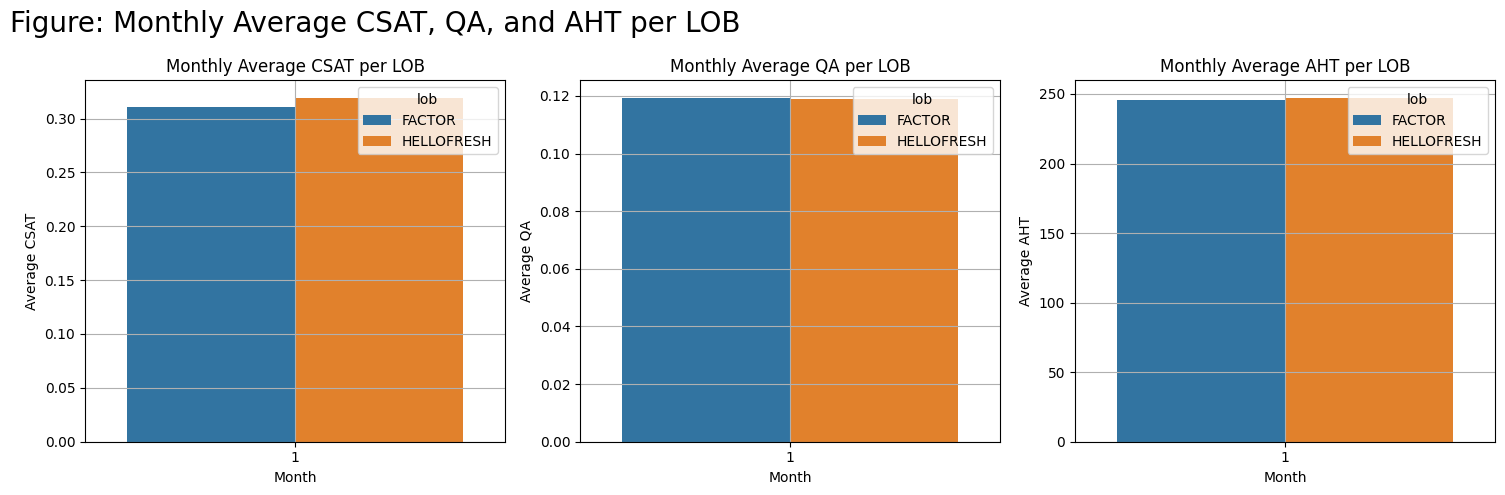

In [16]:
##############################################################
# Data Visualization for the Metric per LOB (Monthly Average)
##############################################################
mon_csat = df_analysis.groupby(['lob', 'month'])['csat'].mean().reset_index()
mon_csat = mon_csat[mon_csat['lob'].isin(['HELLOFRESH','FACTOR'])]
mon_qa = df_analysis.groupby(['lob', 'month'])['qa'].mean().reset_index()
mon_qa = mon_qa[mon_qa['lob'].isin(['HELLOFRESH','FACTOR'])]
mon_aht = df_analysis.groupby(['lob', 'month'])['aht'].mean().reset_index()
mon_aht = mon_aht[mon_aht['lob'].isin(['HELLOFRESH','FACTOR'])]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Figure: Monthly Average CSAT, QA, and AHT per LOB', fontsize=20, ha= 'left', x=0 )

for ax, metric, dataset in zip(axes, ['csat', 'qa', 'aht'], [mon_csat, mon_qa, mon_aht]):
  sns.barplot(
      data=dataset,
      x='month',
      y=metric,
      hue='lob',
      ax = ax
  )
  ax.set_xlabel('Month')
  ax.set_ylabel(f'Average {metric.upper()}')
  ax.set_title(f'Monthly Average {metric.upper()} per LOB')
  ax.grid(True)

plt.tight_layout()
plt.show()



The whole dataset represents one month worth of data. I have used the bar graph to represent the monthly average of the metrics for both lines of business. Based from the figures, the values were close from each other, not differing much.

### Correlation, Scatter Plots, Pair Plot, Test Statistics

We can now start comparing the CSAT, QA, and AHT witih each other to show if there are significant linear relationships between them.

In [19]:
# Correlation between CSAT, QA, and AHT
corr_matrix_h = df_analysis[df_analysis['lob']=='HELLOFRESH'][['csat', 'qa', 'aht']].corr()
print(f' Correlation Matrix: \n {corr_matrix_h}')
corr_matrix_f = df_analysis[df_analysis['lob']=='FACTOR'][['csat', 'qa', 'aht']].corr()
print(f' Correlation Matrix: \n {corr_matrix_f}')

 Correlation Matrix: 
           csat        qa       aht
csat  1.000000 -0.051219 -0.090611
qa   -0.051219  1.000000 -0.178551
aht  -0.090611 -0.178551  1.000000
 Correlation Matrix: 
           csat        qa       aht
csat  1.000000 -0.039856 -0.085034
qa   -0.039856  1.000000 -0.143299
aht  -0.085034 -0.143299  1.000000


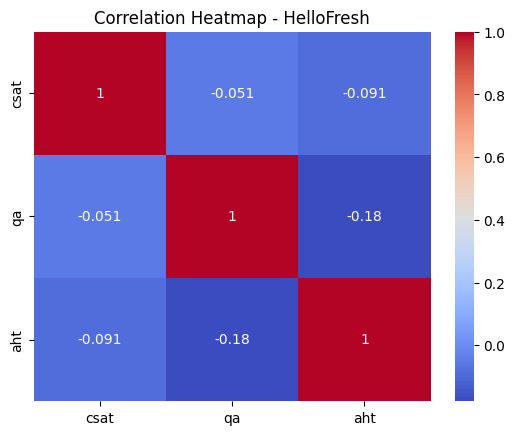

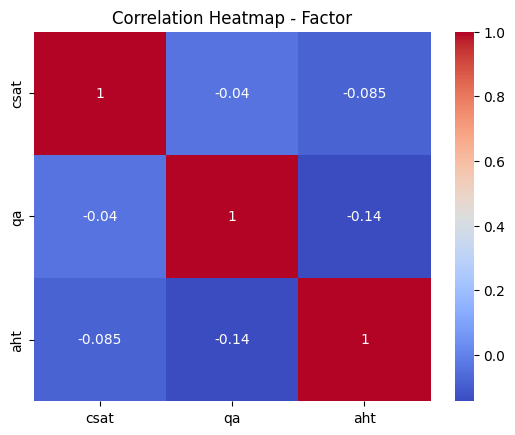

In [20]:
# Heat map visualization
sns.heatmap(corr_matrix_h, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - HelloFresh')
plt.show()
sns.heatmap(corr_matrix_f, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Factor')
plt.show()

The heat map represents the correlation of CSAT, QA, and AHT for both Hello Fresh and Factor. In this case, a correlation of 1 shows a strong linear relationship between variables. Correlating CSAT with CSAT will result to 1 since they have the same set of values. A correlation of -1 will show strong inverse relationship, and a correlation of 0 will show no significant lienar relationships at all. Based on the heat map, CSAT and QA, have correlations close to 0 albeit negative, showing weak negative correlation. Similar to other combinations. This may suggest that the data shows no significant relationship between CSAT and QA, and AHT may not be correlated to CSAT and QA

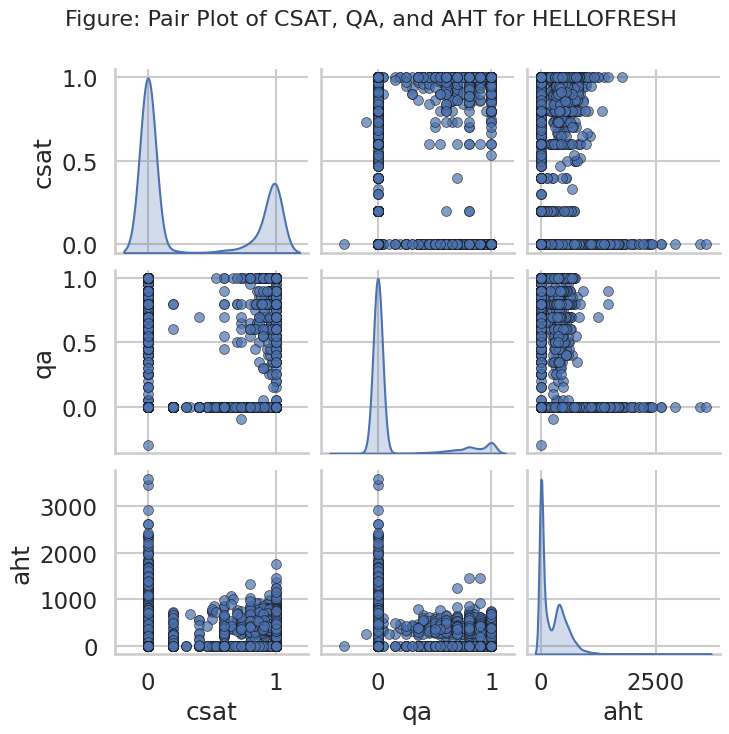

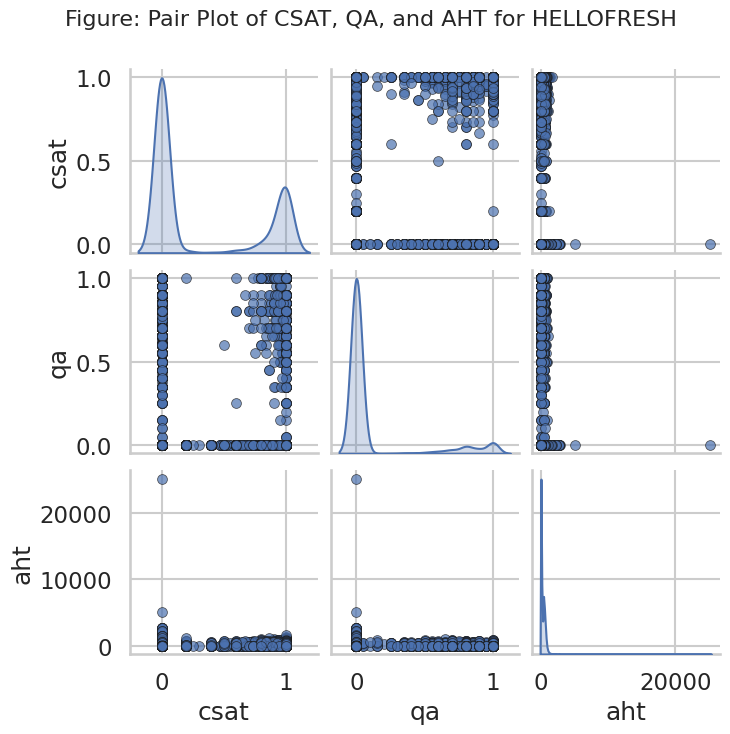

In [51]:
# Pair plot visualization

sns.set_theme(style="whitegrid", context="talk")

# Pair Plot for Hello Fresh
g = sns.pairplot(
    data=df_analysis[df_analysis['lob'] == 'HELLOFRESH'][['csat', 'qa', 'aht']],
    diag_kind="kde",
    plot_kws={"s": 50, "alpha": 0.7, "edgecolor": "k"}  #
)
g.fig.suptitle('Figure: Pair Plot of CSAT, QA, and AHT for HELLOFRESH', fontsize=16, ha='left', x=0.1)
g.fig.subplots_adjust(top=0.9)  #

plt.show()

# Pair Plot for Factor
g = sns.pairplot(
    data=df_analysis[df_analysis['lob'] == 'FACTOR'][['csat', 'qa', 'aht']],
    diag_kind="kde",
    plot_kws={"s": 50, "alpha": 0.7, "edgecolor": "k"}
)

g.fig.suptitle('Figure: Pair Plot of CSAT, QA, and AHT for HELLOFRESH', fontsize=16, ha='left', x=0.1)
g.fig.subplots_adjust(top=0.9)

plt.show()

A pair plot was used to see how each metric is plotted against each other. Metric pairs that are not redundant do not show significant correlation with each other.

### Test Statistics

To further look into the relationships of assumed independent variables, I have used some Test statistics. Before testing, I need to see if the distribution of my data is normal or not, which will affect the test statistics that I will implement.  

In [24]:
# Test Statistics

# Separate Hello Fresh and Factor Dataframes
df_hellofresh = df_analysis[df_analysis['lob'] == 'HELLOFRESH']
df_factor = df_analysis[df_analysis['lob'] == 'FACTOR']

# Assign each metric per LOB to respective variables for normal distribution test
h1 = df_hellofresh['csat']
h2 = df_hellofresh['qa']
h3 = df_hellofresh['aht']
f1 = df_factor['csat']
f2 = df_factor['qa']
f3 = df_factor['aht']


I have used Shapiro-Wilk test, implemented in SciPy as scipy.stats.shapiro(). It is a statistical test used to check whether a dataset follows a normal distribution. Test Statistic: A value between 0 and 1, where values closer to 1 suggest normality. p-value: If p > 0.05, the data is likely normally distributed. If p ≤ 0.05, the null hypothesis (data is normal) is rejected

In [25]:
# Check for Normal Distribution (Hello Fresh)
print(f'Test for Normal Distribution - Hello Fresh')
stat1,p1 = stats.shapiro(h1)
print("Group 1: W-statistic = {:.3f}, p-value = {:.3f}".format(stat1, p1))
stat2,p2 = stats.shapiro(h2)
print("Group 2: W-statistic = {:.3f}, p-value = {:.3f}".format(stat2, p2))
stat3,p3 = stats.shapiro(h3)
print("Group 3: W-statistic = {:.3f}, p-value = {:.3f}".format(stat3, p3))
print("--------------------------------------")

# Check for Normal Distribution (Factor)
print(f'Test for Normal Distribution - Factor')
stat1,p1 = stats.shapiro(f1)
print("Group 1: W-statistic = {:.3f}, p-value = {:.3f}".format(stat1, p1))
stat2,p2 = stats.shapiro(f2)
print("Group 2: W-statistic = {:.3f}, p-value = {:.3f}".format(stat2, p2))
stat3,p3 = stats.shapiro(f3)
print("Group 3: W-statistic = {:.3f}, p-value = {:.3f}".format(stat3, p3))
print("--------------------------------------")

Test for Normal Distribution - Hello Fresh
Group 1: W-statistic = 0.623, p-value = 0.000
Group 2: W-statistic = 0.434, p-value = 0.000
Group 3: W-statistic = 0.817, p-value = 0.000
--------------------------------------
Test for Normal Distribution - Factor
Group 1: W-statistic = 0.620, p-value = 0.000
Group 2: W-statistic = 0.433, p-value = 0.000
Group 3: W-statistic = 0.595, p-value = 0.000
--------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19301.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17833.
  res = hypotest_fun_out(*samples, **kwds)


For both Hello Fresh and Factor, all values were not normally distributed. In this case, I will use Mann-Whitney U-test, which is being used for testing  differences in distributions:
- It assesses whether one group tends to have higher values than the other, without assuming normality.
- Non-Parametric Alternative to the t-test:
- Used when the assumption of normality in a t-test is violated.
- Ranks Instead of Raw Data:
- Instead of comparing means, it ranks all values and compares the sum of ranks between groups.
- For Independent Samples:
- It is used when the two samples are independent (e.g., different groups of people or different conditions).

Hypotheses in Mann-Whitney U-test
Null Hypothesis (H0): The distributions of the two groups are identical.
Alternative Hypothesis (H1): One group tends to have higher (or lower) values than the other.

In [26]:
# Mann-Whitney U-test (Hello Fresh)
print(f'Mann-Whitney U-test - Hello Fresh')
u1, p1 = stats.mannwhitneyu(h1, h2, alternative='two-sided')
print("Group 1 vs Group 2: U-statistic = {:.3f}, p-value = {:.3f}".format(u1, p1))
u2, p2 = stats.mannwhitneyu(h1, h3, alternative='two-sided')
print("Group 1 vs Group 3: U-statistic = {:.3f}, p-value = {:.3f}".format(u2, p2))
u3, p3 = stats.mannwhitneyu(h2, h3, alternative='two-sided')
print("Group 2 vs Group 3: U-statistic = {:.3f}, p-value = {:.3f}".format(u3, p3))
print("--------------------------------------")

# Mann-Whitney U-test (Factor)
print(f'Mann-Whitney U-test - Factor')
u1, p1 = stats.mannwhitneyu(f1, f2, alternative='two-sided')
print("Group 1 vs Group 2: U-statistic = {:.3f}, p-value = {:.3f}".format(u1, p1))
u2, p2 = stats.mannwhitneyu(f1, f3, alternative='two-sided')
print("Group 1 vs Group 3: U-statistic = {:.3f}, p-value = {:.3f}".format(u2, p2))
u3, p3 = stats.mannwhitneyu(f2, f3, alternative='two-sided')
print("Group 2 vs Group 3: U-statistic = {:.3f}, p-value = {:.3f}".format(u3, p3))
print("--------------------------------------")


Mann-Whitney U-test - Hello Fresh
Group 1 vs Group 2: U-statistic = 226515786.000, p-value = 0.000
Group 1 vs Group 3: U-statistic = 95005086.000, p-value = 0.000
Group 2 vs Group 3: U-statistic = 81037203.000, p-value = 0.000
--------------------------------------
Mann-Whitney U-test - Factor
Group 1 vs Group 2: U-statistic = 192065868.000, p-value = 0.000
Group 1 vs Group 3: U-statistic = 80301375.000, p-value = 0.000
Group 2 vs Group 3: U-statistic = 68866875.000, p-value = 0.000
--------------------------------------


For both lines of business, the test have resulted into p < 0.05, showing that the comparisons of CSAT, QA, and AHT, were all significantly different from each other.

  work_setup  csat    qa     aht
1     HYBRID  0.44  0.15  238.64
2     ONSITE  0.31  0.12  237.90
3        WFH  0.33  0.12  260.14
  work_setup  csat    qa     aht
1     ONSITE  0.30  0.12  234.11
2        WFH  0.32  0.12  258.19


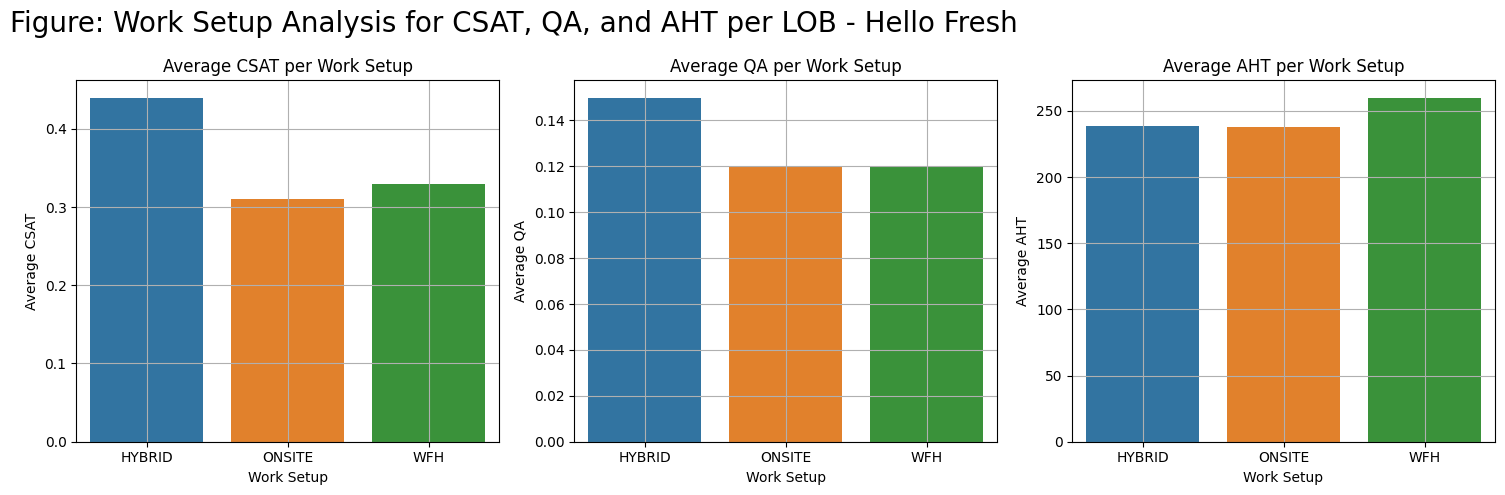

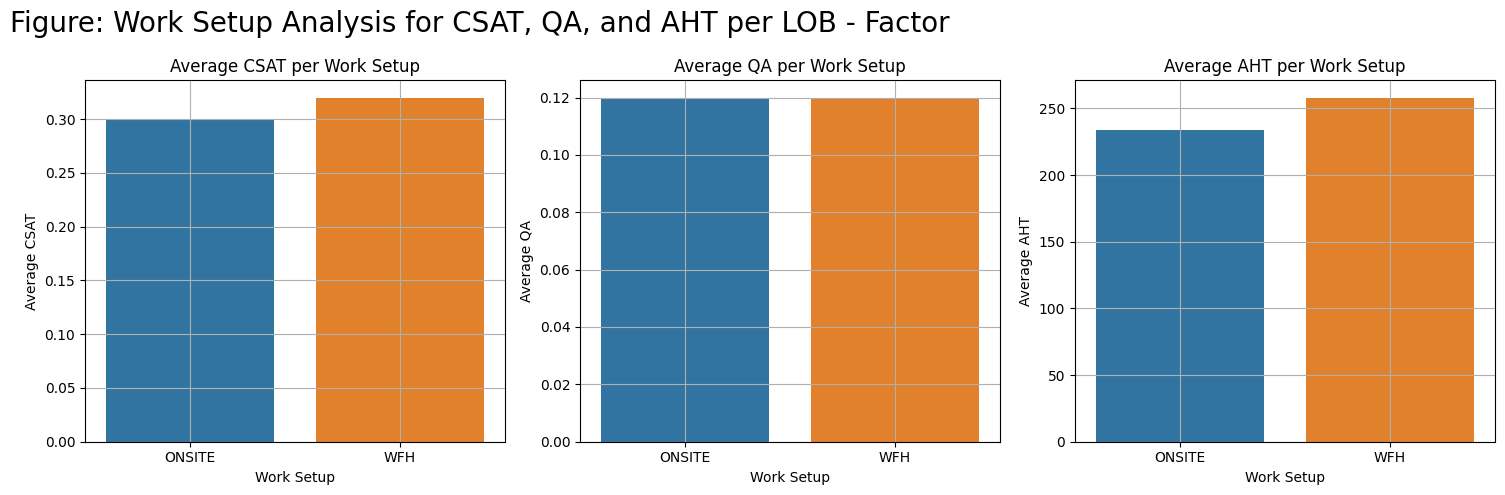

In [48]:
##########################
# Work Setup Analysis
##########################

wsh = df_analysis[df_analysis['lob'] == 'HELLOFRESH'].groupby('work_setup')[['csat', 'qa','aht']].mean().reset_index().round(2)
wsh = wsh[wsh['work_setup'].isin(['ONSITE','HYBRID', 'WFH'])]
wsf = df_analysis[df_analysis['lob'] == 'FACTOR'].groupby('work_setup')[['csat', 'qa','aht']].mean().reset_index().round(2)
wsf = wsf[wsf['work_setup'].isin(['ONSITE','HYBRID', 'WFH'])]

##########################
# Work Setup Visualization
##########################

# Work Setup - Hello Fresh
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Figure: Work Setup Analysis for CSAT, QA, and AHT per LOB - Hello Fresh', fontsize=20, ha= 'left', x=0 )

for ax, metric in zip(axes, ['csat', 'qa', 'aht']):
  sns.barplot(
      data=wsh,
      x='work_setup',
      y=metric,
      hue = 'work_setup',
      ax = ax
  )
  ax.set_xlabel('Work Setup')
  ax.set_ylabel(f'Average {metric.upper()}')
  ax.set_title(f'Average {metric.upper()} per Work Setup')
  ax.grid(True)

plt.tight_layout()
plt.show()

# Work Setup - Factor
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Figure: Work Setup Analysis for CSAT, QA, and AHT per LOB - Factor', fontsize=20, ha= 'left', x=0 )

for ax, metric in zip(axes, ['csat', 'qa', 'aht']):
  sns.barplot(
      data=wsf,
      x='work_setup',
      y=metric,
      hue = 'work_setup',
      ax = ax
  )
  ax.set_xlabel('Work Setup')
  ax.set_ylabel(f'Average {metric.upper()}')
  ax.set_title(f'Average {metric.upper()} per Work Setup')
  ax.grid(True)

plt.tight_layout()
plt.show()



The last question is about the metric comparisons between work setups. For Hello Fresh, there are three options - HYBRID, ONSITE, and WFH, while there are onlyy 2 for Factor - ONSITE and WHF. The graphs suggest that CSAT and QA were high for Hello Fresh, having low AHT when the work setup is Hybrid. For Factor, WFH yields better CSAT and QA, but somehow higher AHT.

## Answer to Questions:

- What relationship does the CSAT metric have with the QA metric?
  - Answer: The graphs tell that CSAT and QA were both high within certain weeks of the month, but the correlation and test statistics suggest that there are no significant relationship between them.
- How does the AHT metric affect the CSAT and QA metrics?
  - Answer: There are graphs showing that when CSAT and QA were high, AHT was lower compared to other parts of the week, but the correlation and test statistics suggest that they do not have strong correlation and significantly different from CSAT and QA
- What are the main differences between the performance of the agents in the HELLOFRESH and FACTOR LOBs?
  - Answer: Hello Fresh and Factor agents were almost similar in performance, as based from the monthly average plotted.
- How does the performance of on-site agents compare to remote agents?
  - The graphs do tell that for Hello Fresh agents, doing hybrid work results to better CSAT and QA scores with lower AHT. But for Factor, WFH results to better CSAT and QA, but with longer AHT.